In [1]:
import numpy as np
from scipy.linalg import toeplitz
from scipy import linalg as spla
import matplotlib.pyplot as plt

### Una importante familia de matrices son las matrices de Toeplitz:

$$
    T_n = 
    \begin{pmatrix}
        a_0     & a_{-1}  & a_{-2} & \dots  & a_{-n+1}\\
        a_1     & a_{0}   & a_{-1} & \dots  & \vdots  \\
        a_2     & a_{1}   & a_{0}  & \dots  & a_{-2}  \\
        \vdots  & \ddots  & \ddots & \ddots & a_{-2}  \\
        a_{n-1} & \dots   & a_2    & a_1    & a_0
    \end{pmatrix}
    \in \mathbb{R}^{nxn},
$$

### donde $a_k \in \mathbb{R}$ para $k \in {−n + 1, . . . , n − 1}$. Este tipo de matrices es usada en procesamiento de series de tiempo, análisis de señales e imágenes, entre otros. El problema a tratar es nuestro conocido sistema de ecuaciones lineales $T_n x = b$, en donde $b$ se interpreta como la señal de entrada y $x$ como la señal de salida luego de haber sido procesada por la matriz respectiva, en nuestro caso $T_n$.

### Preguntas

#### (a) Considerando que $a_j = 0$ para $|j| > m$, determine el número de operaciones elementales mínimas requeridas para obtener la factorización $LU$ de la matriz $T_n$. Por simplicidad considere que no es necesario hacer permutaciones. Considere que $m < n$. 

#### _Hint: You don’t need to make 0 what it is already 0. Even more, you don’t need to add 0 either since you already know it won’t change anything._

### Desarrollo

Tenemos que anular $m$ coeficientes por fila, para esto realizaremos 1 división, $m+1$ productos y $m+1$ restas. Esto puede realizarse en $n-m$ filas, a la primera no se le realiza ninguna operación y para las restantes $m-1$ utilizamos eliminación Gaussiana, por lo que tiene un costo aproximado de $\frac{2}{3}(m-1)^3$

\begin{align}
    Total_{operaciones} &= (n-m)(2(m+1+m+1)+1) + \frac{2}{3}(m-1)^3\\
    Total_{operaciones} &= (n-2)(4m+6) + 2m+1\\
    Total_{operaciones} &= 4mn +6n - 8m-12 + 2m+1\\
    Total_{operaciones} &= 4mn +6n - 6m -11\\
\end{align}

#### (b) Considere que usted tiene un computador que se demora aproximadamente $2.3 [ns]$ por $FLOP$ y que su matriz $T_n$ utiliza $32 [GB]$ de RAM almacenando todos los elementos de la matriz. 

#### ¿Cuanto es la reducción de tiempo al considerar la factorización LU de la pregunta anterior respecto a la factorización LU tradicional?

#### _Hint: We will consider a FLOP (FLoating point OPeration) as the time it takes to compute one fundamental operation: +,−,∗ or /._


### Desarrollo

Podemos obtener el tiempo de ejecución de la siguiente forma:

$$
    time = n_{operaciones}*tiempo_{operacion}
$$

Considerando que cada operación tarda $2.3[ns]$, entonces $LU$ tradicional tarda:

$$
    t_{LU} = \frac{2}{3}n^3\cdot 2.3 \cdot10^{-9} [s]
$$

Y el tiempo que tarda $LU_a$ es:

$$
    t_{LU_{a}} = (4mn +6n - 6m -11)\cdot 2.3 \cdot10^{-9} [s]
$$

Para obtener cuanto es la reducción de tiempo hacemos $t_{LU} - t_{LU_a}$.

\begin{align}
    t_{LU}-t_{LU_a} &= \frac{2}{3}n^3\cdot 2.3 \cdot10^{-9} - (4mn +6n - 6m -11)\cdot 2.3 \cdot10^{-9}\\
    t_{LU}-t_{LU_a} &= 2.3 \cdot 10^{-9}(\frac{2}{3}n^3 - (4mn +6n - 6m -11))\\
    t_{LU}-t_{LU_a} &= 2.3 \cdot 10^{-9}(\frac{2}{3}n^3 - 4mn -6n + 6m +11)\\
\end{align}

Obtendremos n, como sabemos que $T_n$ ocupa $32GB$ de memoria, podemos obtener el tamaño de la matriz, para esto asumiremos que cada elemento de la matriz ocupa $8 bytes$(float size).

\begin{align}
    n^2 * 8[B] &= 32 * 10^9 [B]\\
    n^2        &= 4 * 10^9     \\
    n          &\approx 63245
\end{align}

Reemplazando en la diferencia de tiempos:

\begin{align}
    t_{LU}-t_{LU_a} &= 2.3 \cdot 10^{-9}(\frac{2}{3}(63245)^3 - 4m(63245) -6(63245) + 6m +11)\\
    t_{LU}-t_{LU_a} &= 2.3 \cdot 10^{-9}(\frac{505951147723873}{3} - 252979m)\\
    t_{LU}-t_{LU_a} &= 387895.879922 - 0.000582m [s]\\
\end{align}

Si comparamos $t_{LU}$ vs $t_{LU_a}$ obtenemos los siguientes tiempos:

$$
    t_{LU} = \frac{505951148862250}{3}[s] 
$$

$$
    t_{LU_a} = 0.000734m+0.0011 [s]
$$

Se logra apreciar que existe una diferencia muy grande para la matriz $T_n$. Es importante notar que a medida que m aumenta, el tiempo que se tarda en realizar el cálculo también aumentara.

#### (c) Considere por simplicidad que $a_j = a_{−j}$  $\forall j$, y que usted recibe como *input* el vector $a \in \mathbb{R}^n$, donde los coeficientes de *$a$* corresponden a los coeficientes requeridos para construir $T_n$. Implemente un algoritmo que retorne la descomposición matricial $PALU$ de $T_n$ donde el *input* es el vector *a* y el *output* son las matrices $P$, $L$ y $U$ de la descomposición $PALU$ de $T_n$. Note que en este caso, si corresponde, es necesario hacer pivoteo.

### Desarrollo

In [14]:
def paluTn(a):
    Tn = toeplitz(a)
    P, L, U = spla.lu(Tn)
    print(Tn)
    return P, L, U

##### (d) Muestre con ```matplotlib.pyplot.spy``` los patrones obtenidoa de $L$ y $U$, respectivamente, para el input $a = \langle 1, 1/4, 1/9, \dots , 1/64, 0, \dots 0\rangle \in \mathbb{R}^{100}$.

### Desarrollo

[[1.         0.25       0.11111111 ... 0.         0.         0.        ]
 [0.25       1.         0.25       ... 0.         0.         0.        ]
 [0.11111111 0.25       1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.25       0.11111111]
 [0.         0.         0.         ... 0.25       1.         0.25      ]
 [0.         0.         0.         ... 0.11111111 0.25       1.        ]]


Text(0.5, 1.05, 'Patron de U')

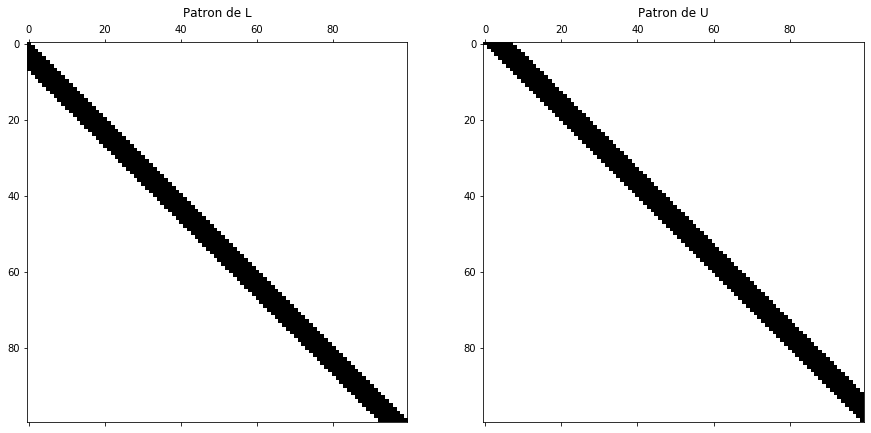

In [13]:
#Creamos a
a = np.zeros(100)
for i in range(8):
    a[i] = 1/((i+1)**2)
P, L, U = paluTn(a)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))

ax1.spy(L)
ax1.set_title('Patron de L')
ax2.spy(U)
ax2.set_title('Patron de U')

##### (e) ¿Siguen las matrices $L$ y $U$ el mismo patron de sparsity que $T_n$?

### Desarrollo

$L$ y $U$ deberían seguir un patrón similar, tal que $L$ tenga el patrón de la diagonal inferior y $U$ el de la superior.

Podemos corroborar comparando el sparsity de $T_n$ con la suma $L+U$.

Text(0.5, 1.05, 'Patron de L+U')

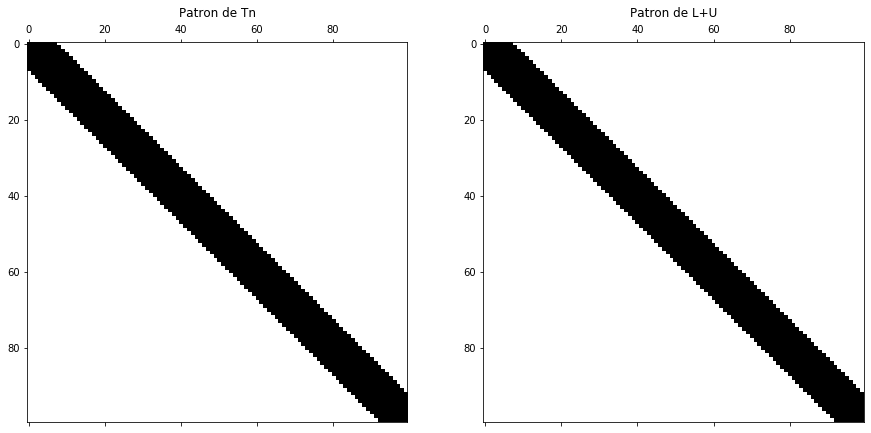

In [11]:
Tn = toeplitz(a)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))

ax1.spy(Tn)
ax1.set_title('Patron de Tn')
ax2.spy(L+U)
ax2.set_title('Patron de L+U')